# Variables influencing the students’ academic performance

## Investigation Overview

For this investigation, I wanted to check some variables that influence students’ academic performance in the PISA test. The focus of my analysis was on these variables: country, is_oecd, gender, belong at school, feel happy at school, and computers’ availability at schools.


## Dataset Overview

The dataset is mainly about a survey of students' skills and knowledge as they approach the end of compulsory education. I cleaned this data from the original one provided by Udacity and now it is about 194, 082 students’ who took the test, answering the survey questions.  



In [1]:
import datetime
import io
import calendar
import glob
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import codecs
from pandas.api.types import CategoricalDtype

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Reading the cleaned pisa dataset
pisa_df = pd.read_csv("pisa_data_cleaned.csv", encoding = "latin-1")

In [3]:
# Converting data into appropiate data types

pisa_df["is_oecd"] = pisa_df["is_oecd"].astype('category')
pisa_df['gender'] = pisa_df['gender'].astype('category')

def ca_conv(df, cols, likert):
    for col in cols:
        df[col] = df[col].astype(CategoricalDtype(categories = likert))

cat_likert = {'Strongly agree' : 4, 'Agree' : 3, 'Disagree' : 2, 'Strongly disagree' : 1}
num_likert = [4, 3, 2, 1]

# a list that has column names
cat_list = ["belong_at_school", "feel_happy_at_school"]

pisa_df.replace([k for k in cat_likert], [cat_likert[k] for k in cat_likert], inplace = True)
ca_conv(pisa_df, cat_list, num_likert)


school_likert = ["Yes", "No"]
school_list = ["computer_at_school"]

ca_conv(pisa_df, school_list, school_likert)


In [4]:
pisa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194082 entries, 0 to 194081
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   country               194082 non-null  object  
 1   is_oecd               194082 non-null  category
 2   birth_month           194082 non-null  int64   
 3   birth_year            194082 non-null  int64   
 4   gender                194082 non-null  category
 5   belong_at_school      194082 non-null  category
 6   feel_happy_at_school  194082 non-null  category
 7   computer_at_school    194082 non-null  category
 8   age_of_student        194082 non-null  float64 
 9   pv1_mathematics       194082 non-null  float64 
dtypes: category(5), float64(2), int64(2), object(1)
memory usage: 8.3+ MB


## Distribution of Mathematics Scores

Students scores are approximately between 190 aand 900. Most of them score between 400 and 600 out of 1000 and the mean for all scores is around 500. 

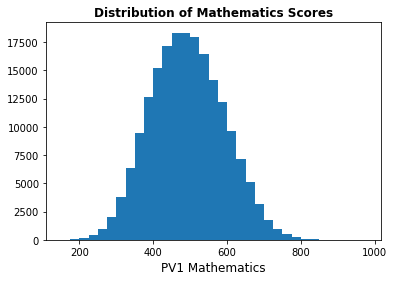

In [5]:
bins = np.arange(150,pisa_df["pv1_mathematics"].max() + 26, 25)
plt.hist(pisa_df["pv1_mathematics"], bins = bins)
plt.xlabel("PV1 Mathematics", fontsize = 12)
plt.title("Distribution of Mathematics Scores", fontweight = "bold");

# Countries with most students who took the test

Mexico city is the most frequent city for students who took the PISA test followed by Italy and Spain. 

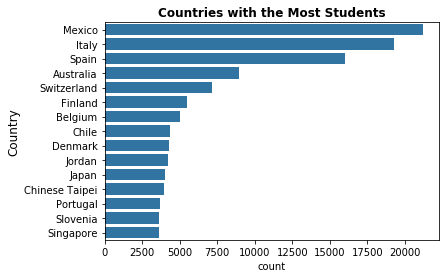

In [6]:
# using counplot to get the number of students per country
base_color = sns.color_palette()[0]
country_order = pisa_df["country"].value_counts().iloc[:15].index
sns.countplot(y = "country", data = pisa_df, color = base_color, order = country_order)
plt.ylabel("Country", fontsize = 12)
plt.title("Countries with the Most Students", fontweight = "bold");

# Countries with the best scores:

China-Shanghai is the top country with the most students scored more than the mean of the whole Mathematics scores followed by Chinese Taipei and Signapore. Also, something I noticed that only two countries from the OECD are from the top 10.

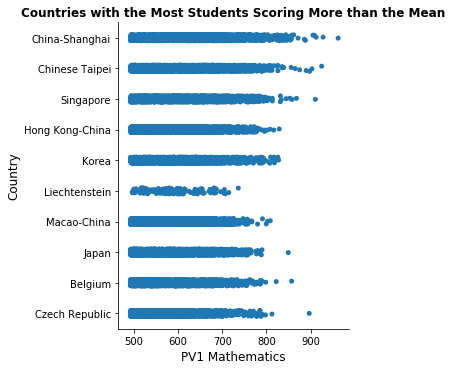

In [7]:
# Let's check students who got more than or equal to the average math score
avg_students_math = pisa_df.query('pv1_mathematics >= pv1_mathematics.mean()')

country_index = avg_students_math.groupby('country')["pv1_mathematics"].mean()
country_order = country_index.sort_values(ascending = False).iloc[:10].index
sns.catplot(x = "pv1_mathematics", y = "country", data = avg_students_math,
            color = base_color, order = country_order)
plt.ylabel("Country", fontsize = 12)
plt.xlabel("PV1 Mathematics", fontsize = 12)
plt.title("Countries with the Most Students Scoring More than the Mean", fontweight = "bold");



# Countries with the lowest scores

These countries have the lowest scores. Jordan is scoring the lowest for the average Math scores followed by Costa Rica and Uruguay. It might be that educational system is playing a role in affecting students' scores.

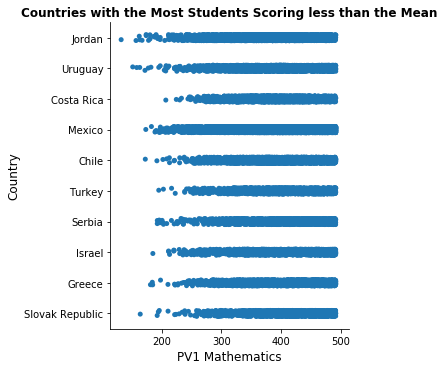

In [8]:
less_avg_students_math = pisa_df.query('pv1_mathematics < pv1_mathematics.mean()')

country_index = less_avg_students_math.groupby('country')["pv1_mathematics"].mean()
country_order = country_index.sort_values(ascending = True).iloc[:10].index
sns.catplot(x = "pv1_mathematics", y = "country", data = less_avg_students_math,
            color = base_color, order = country_order)
plt.ylabel("Country", fontsize = 12)
plt.xlabel("PV1 Mathematics", fontsize = 12)
plt.title("Countries with the Most Students Scoring less than the Mean", fontweight = "bold");


# Gender Ratio

Females are more than males in the dataset, but there is not a big difference between both of them.

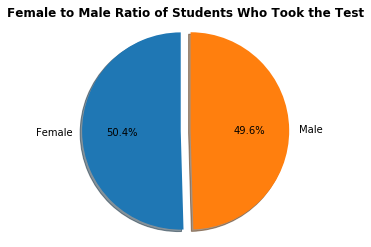

In [9]:
# checking the female to male ratio using matplotlib
labels = pisa_df["gender"].unique()
sizes = list(pisa_df["gender"].value_counts())
explode = (0.1, 0) 

fig, ax = plt.subplots()
ax.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%',
        shadow = True, startangle = 90)
ax.axis('equal')
ax.set_title("Female to Male Ratio of Students Who Took the Test", fontweight = "bold")

plt.show()

#  Mathematics scores per gender for the whole dataset

Females’ and males’ scores are not so different from each other. Both of them are approximately in the same interquartile range between 400 and 600.

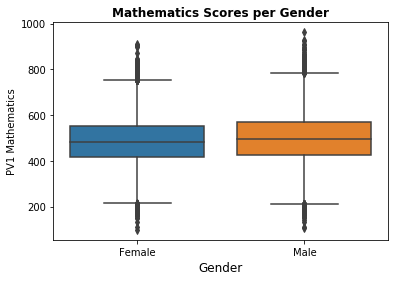

In [10]:
# Checking the difference between the scores of males and females using boxplot
sns.boxplot(x = "gender", y = "pv1_mathematics", data = pisa_df)
plt.title("Mathematics Scores per Gender", fontweight = "bold")
plt.xlabel("Gender", fontsize = 12)
plt.ylabel("PV1 Mathematics");

# Mathematics scores in China-Shanghai (Best scoring country) and Jordan (Least scoring country) per gender

For both countries, there is not a big difference between the two genders, and that is would give us an insight that gender is not correlated to academic performance.

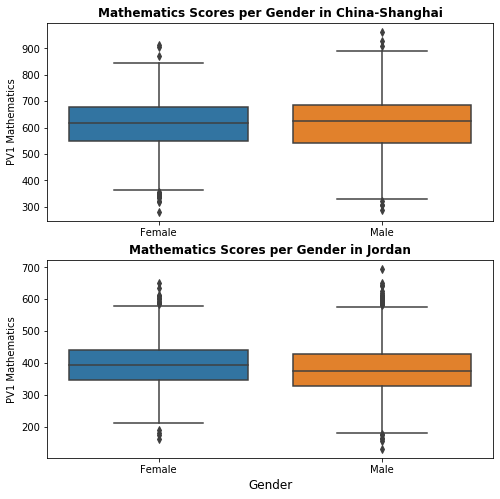

In [11]:
 plt.subplots(figsize = (8,8))

ax1 = plt.subplot(2, 1, 1)


# Checking the difference between the scores of males and females in China-Shanghai using boxplot
China_Shanghai_df = pisa_df.query("country == 'China-Shanghai'")
sns.boxplot(x = "gender", y = "pv1_mathematics", data = China_Shanghai_df)

plt.title("Mathematics Scores per Gender in China-Shanghai", fontweight = "bold")
plt.xlabel("")
plt.ylabel("PV1 Mathematics");

ax2 = plt.subplot(2, 1, 2, sharex = ax1)

jordan_df = pisa_df.query("country == 'Jordan'")
sns.boxplot(x = "gender", y = "pv1_mathematics", data = jordan_df)
plt.title("Mathematics Scores per Gender in Jordan", fontweight = "bold")
plt.xlabel("Gender", fontsize = 12)
plt.ylabel("PV1 Mathematics");


## Comparing students' scores between OECD and Non-OECD countries

Based on the graph, there is a higher probability for OECD students to achieve better scores than the Non-OECD countries.

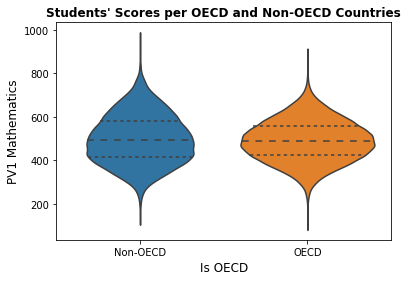

In [12]:
sns.violinplot(data = pisa_df, x = 'is_oecd', y = 'pv1_mathematics',
               inner = 'quartile')

plt.xlabel("Is OECD", fontsize = 12)
plt.ylabel('PV1 Mathematics', fontsize = 12)
plt.title("Students' Scores per OECD and Non-OECD Countries", fontweight = 'bold');


## Comparing students' scores between OECD and Non-OECD countries per Gender

The width of sections for both genders is extremely alike each other for both OECD and Non_OECD countries. But the difference between mathematics scores is much clearer between countries type whether it is OECD or not. Therefore, the conclusion is that academic performance doesn't depend on gender, it is more about the county or to be more accurate in the education system of the country.


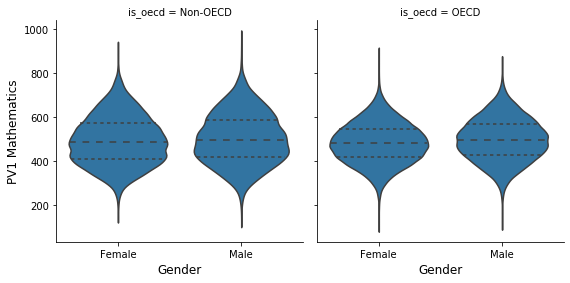

In [13]:
ax = sns.FacetGrid(data = pisa_df, col = 'is_oecd', size = 4)
ax.map(sns.violinplot, 'gender', 'pv1_mathematics', inner = "quartile")

#ax.set_title("Mathematics Scores per Gender for OECD and Non_OECD Countries")
ax.set_xlabels("Gender", fontsize = 12)
ax.set_ylabels("PV1 Mathematics", fontsize = 12);


## Comparing Students' feelings at school to the means of their Scores

Schools that help students to feel belonging to it and who make students feel happier, make students achieve higher grades.

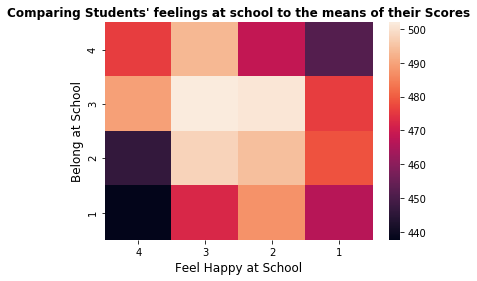

In [14]:
school_att = pisa_df.groupby(['feel_happy_at_school', "belong_at_school"])["pv1_mathematics"].mean().reset_index()
school_att = school_att.pivot("belong_at_school", "feel_happy_at_school","pv1_mathematics")
ax = sns.heatmap(school_att)
plt.xlabel('Feel Happy at School', fontsize = 12)
plt.ylabel('Belong at School', fontsize = 12)
plt.title("Comparing Students' feelings at school to the means of their Scores",
          fontweight = 'bold');

##  Number of Students that Had Computers in their Schools per OCED and Non-OECD countries

OECD countries have more computers in their schools than non-oecd ones

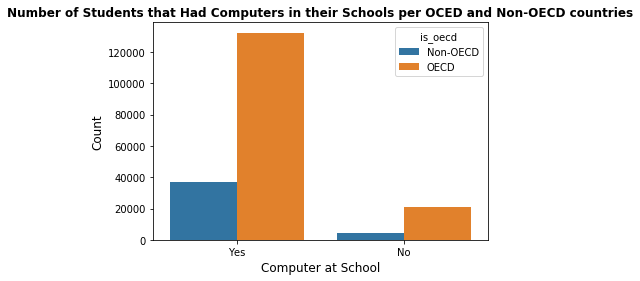

In [15]:
# Checking which schools has more computers, the one in the OECDs or in the Non-OECDs
com_count = pisa_df.groupby('computer_at_school').size()
com_order = com_count.index

sns.countplot(data = pisa_df, x = "computer_at_school",
              hue = "is_oecd", order = com_order)

plt.xlabel("Computer at School", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.title("Number of Students that Had Computers in their Schools per OCED and Non-OECD countries"
          , fontweight = "bold");

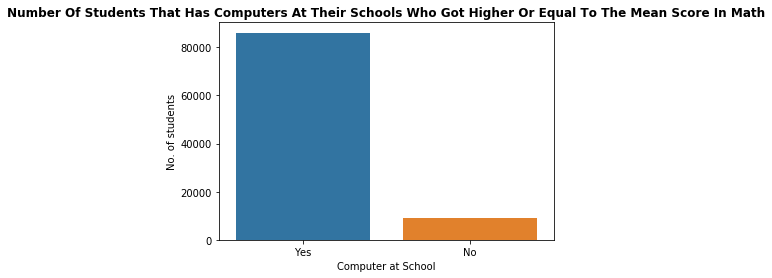

In [16]:
# Creating a dataframe of students who scored greater than the mean
greater_mean_df_math = pisa_df.query("pv1_mathematics >= pv1_mathematics.mean()")

sns.countplot(data = greater_mean_df_math, x = 'computer_at_school')
plt.title("Number of Students that has Computers at their schools who got higher or equal to the mean score in math".title(), 
           fontweight = "bold")
plt.xlabel("Computer at School")
plt.ylabel("No. of students");


## Comparing mathematics scores to computers avability at schools for top 6 countries

The more computers these schools have, the better grades students can achieve. However, some students of these countries achieved high gardes although they did not have computers at their schools.

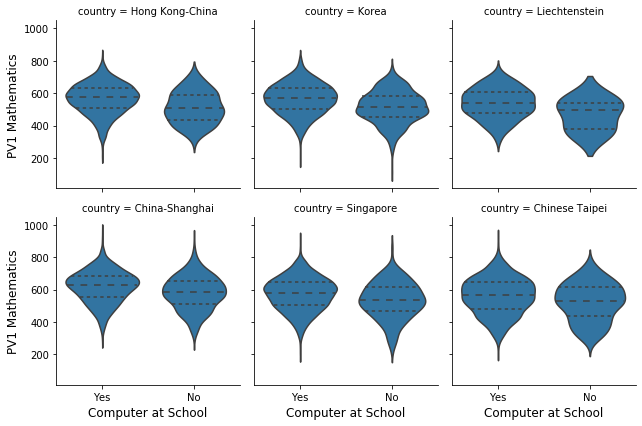

In [17]:
top_countries_df = pisa_df.query('country == ["China-Shanghai", "Singapore", "Hong Kong-China", "Chinese Taipei", "Korea", "Liechtenstein"]')

ax = sns.FacetGrid(data = top_countries_df, col = 'country', col_wrap = 3, size = 3)
ax.map(sns.violinplot, 'computer_at_school', 'pv1_mathematics', 
       inner = "quartile")

ax.set_xlabels("Computer at School", fontsize = 12)
ax.set_ylabels("PV1 Mathematics", fontsize = 12);

## Comparing mathematics scores to computers avability at schools for the lowest 6 countries

This plot confirms our previous findings that even at the countries with lowest scores, having computers at schools makes students achieved higer grades. For schools that do not have computers, it is obvious to see the density of students who achieved less than the average.

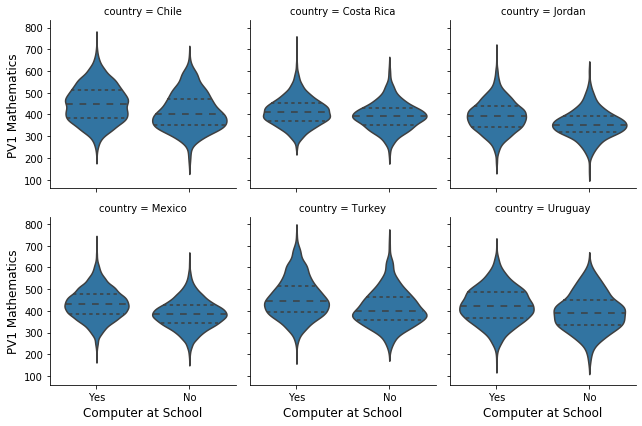

In [18]:
lowest_countries_df = pisa_df.query('country == ["Jordan", "Costa Rica", "Uruguay", "Mexico", "Chile", "Turkey"]')
country_index = lowest_countries_df.groupby('country')["pv1_mathematics"].mean()
country_order = country_index.sort_values(ascending = False).index

ax = sns.FacetGrid(data = lowest_countries_df, col = 'country',
                   col_wrap = 3, size = 3)
ax.map(sns.violinplot, 'computer_at_school', 'pv1_mathematics', inner = "quartile")
ax.set_xlabels("Computer at School", fontsize = 12)
ax.set_ylabels("PV1 Mathematics", fontsize = 12);

## Comparing students' feelings to the scores' mean for the top and least country in Mathematics scores

In china-shanghai, the country with the best scores, most students feel like that they are happy at it and belonging to it and this is reflected on their mean scores between 500 and 600. On the other hand in Jordan, the country with lowest scores, students does not feel happiness or belonging to school and that is why their scores' means are between 380 and 400.

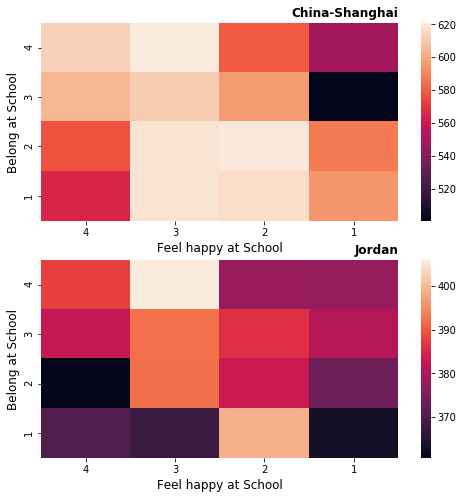

In [19]:
# Checking how students feel in China-Shanghai (The country with the best scores)
plt.subplots(figsize = (8,8))

plt.subplot(2, 1, 1)

China_Shanghai_df = pisa_df.query('country == "China-Shanghai"')
school_att = China_Shanghai_df.groupby(['feel_happy_at_school', "belong_at_school"])["pv1_mathematics"].mean().reset_index()
school_att = school_att.pivot("belong_at_school", "feel_happy_at_school","pv1_mathematics")
ax = sns.heatmap(school_att)
plt.title("China-Shanghai", loc = "right", fontweight = "bold")
plt.xlabel("Feel happy at School", fontsize = 12)
plt.ylabel("Belong at School", fontsize = 12);

# Checking how students feel in Jordan (The country with the lowest scores)

plt.subplot(2, 1, 2)

jordan_df = pisa_df.query('country == "Jordan"')
school_att = jordan_df.groupby(['feel_happy_at_school', "belong_at_school"])["pv1_mathematics"].mean().reset_index()
school_att = school_att.pivot("belong_at_school", "feel_happy_at_school","pv1_mathematics")
ax = sns.heatmap(school_att)
plt.title("Jordan", loc = "right", fontweight = 'bold')
plt.xlabel("Feel happy at School", fontsize = 12)
plt.ylabel("Belong at School", fontsize = 12);



## Comparing gender achievments (Scoring more than the mean) for the top and least countries in Mathemeatics scores

There is not any significant difference between males and females in math scores. In some countries, males are better, in other countries we see that females are better, but even in both scenarios, the difference is not important to talk about. This suggests that gender does not have any correlation with academic performance.

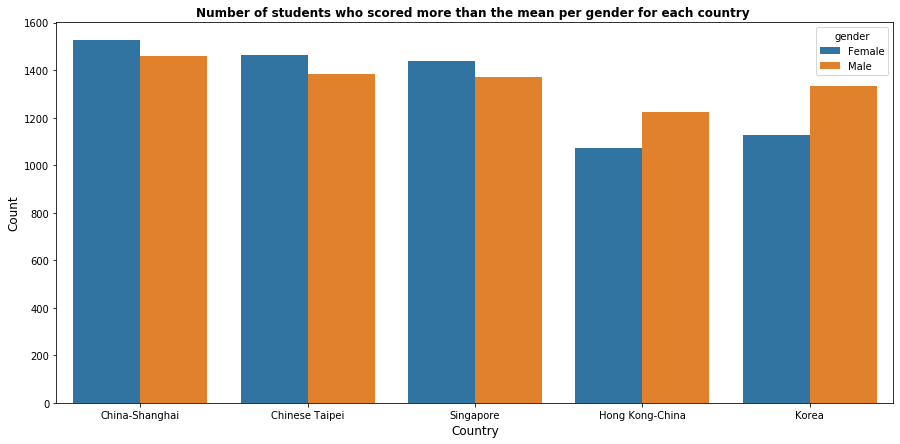

In [20]:
plt.figure(figsize=[15, 7])

top_countries_df = pisa_df.query("pv1_mathematics >= pv1_mathematics.mean()")
top_countries_df = top_countries_df.query('country == ["China-Shanghai", "Singapore", "Hong Kong-China", "Chinese Taipei", "Korea"]')

country_index = top_countries_df.groupby('country')["pv1_mathematics"].mean()
country_order = country_index.sort_values(ascending = False).index

sns.countplot(x = "country", hue = "gender", data = top_countries_df, order = country_order)
plt.title("Number of students who scored more than the mean per gender for each country ",
          fontweight = "bold")
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Count", fontsize = 12);

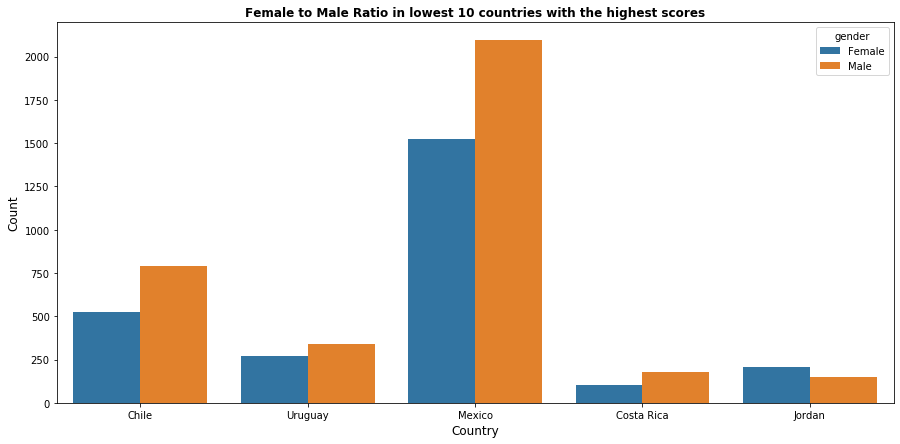

In [21]:
plt.figure(figsize=[15, 7]);

lowest_countries_df = pisa_df.query("pv1_mathematics >= pv1_mathematics.mean()")
lowest_countries_df = lowest_countries_df.query('country == ["Jordan", "Costa Rica", "Uruguay", "Mexico", "Chile"]')

country_index = lowest_countries_df.groupby('country')["pv1_mathematics"].mean()
country_order = country_index.sort_values(ascending = False).index

sns.countplot(x = "country", hue = "gender", data = lowest_countries_df, order = country_order)
plt.title("Female to Male Ratio in lowest 10 countries with the highest scores", fontweight = "bold")
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Count", fontsize = 12);